### Classification and Association Rule Mining

#### Part A: Classification

**Instruction:**

1. Train a Decision Tree classifier (scikit-learn) on train set. 
    - Predict on test set; compute accuracy, precision, recall, F1-score.

    - Visualize the tree (using plot_tree).

- A decision tree is a model that splits data based on questions (like: “Is petal length > 2.5?”) to decide what class (species) something belongs to.

- Metrics:

    - Accuracy – what percentage was predicted correctly?

    - Precision – how many predicted positives were correct?

    - Recall – how many actual positives were found?

    - F1-score – balances precision and recall

    These metrics help understand how well the model performs, not just whether it’s right or wrong.

- 'plot_tree':It shows the questions and thresholds used to classify data.

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
# Loading the iris dataset
iris = load_iris()

# Convert to pandas DataFrame 
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


# Normalizing features using Min-Max scaling
# Normalizing to a common range, 0 to 1, to ensure no feature unfairly dominates due to scale

features = df_iris.columns[:-1]  # all except species
scaler = MinMaxScaler()
df_iris[features] = scaler.fit_transform(df_iris[features])


# Encoding/converting class label (species: 'setosa', 'versicolor', 'virginica') as numbers
le = LabelEncoder()
df_iris['species_encoded'] = le.fit_transform(df_iris['species'])


# Splitting the data into training and testing
# 'x' is sepal length, sepal width, petal length, petal width (all normalized between 0 and 1)
X = df_iris.iloc[:, :-2]  # features (exclude species and encoded)

# 'y' is the target variable 'species_encoded'
# 'y' is what ML model will try to predict based on 'x'
y = df_iris['species_encoded']

# X_train: features for training
# X_test: features for testing
# y_train: target labels for training
# y_test: target labels for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) # with stratification to keep the dataset balanced



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



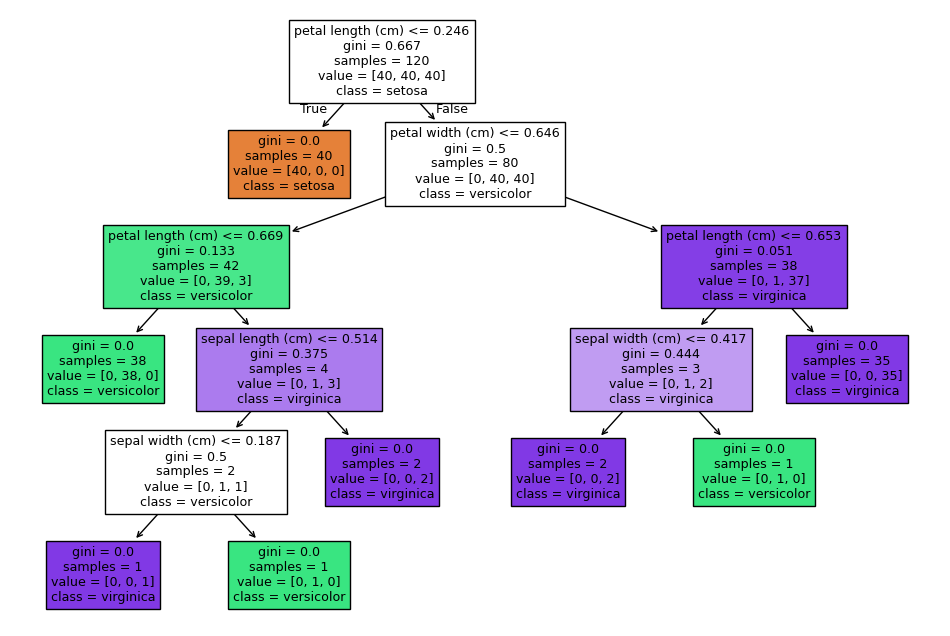

In [3]:
# Training the model on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Using the model to predict on the test set
y_pred = clf.predict(X_test)

# Evaluation Metrics (how well the model performs)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the 'plot_tree' (it shows the questions and thresholds used to classify data.)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=iris.target_names, filled=True)
plt.savefig("decision_tree.png")
plt.show()

**Instruction:**

2. Compare with another classifier (e.g., KNN with k=5); report which is better and why.

- K-Nearest Neighbors (KNN) classifies a data point by checking the “k” closest points in the training data.

In [4]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Classifying by KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
# training on the model on the training set
knn.fit(X_train, y_train)
# Using the model to predict on the test set
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:")
# Evaluation Metrics (how well the model performs)
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Report:**

- Decision Tree Classification:
    - precision: 0.90
    - recall: 0.90
    - f1-score: 0.90 
    - accuracy: 0.93

- KNN Classification:
    - precision: 1.00 
    - recall: 0.90
    - f1-score: 0.95
    - accuracy: 0.97 

- Best Model to Use: KNN CLASSIFICATION

    - Perfect precision (1.00) for flower species determination → Every predicted flower species was indeed its actual species.

    - Recall is the same (0.90) which means 90% were true positives.

    - f1-score is 0.95 which is slightly greater that of Decision Tree (0.90), this mean KNN has better balance between precision and recall.

    - Highest accuracy (0.97) overall, meaning 97% of the data was predicted correctly.


--------------------------

#### Part B: Association Rule Mining

**Dataset Option:**

Generate synthetic transactional data (e.g., 20-50 transactions, each a list of 3-8 items from a pool of 20 items like ['milk', 'bread', 'beer', 'diapers', 'eggs', etc.]; use random.choices to create baskets with patterns, like frequent co-occurrences). Use Python lists or pandas. Include generation code.

In [21]:
# Loading necessary libraries
import pandas as pd
import random
from mlxtend.frequent_patterns import apriori, association_rules

In [22]:
# Set seed for reproducibility
random.seed(123)

# Creating a product pool of 20 items
products = ['chevdo', 'shrikhand', 'chakri', 'sev', 'ladoo', 
           'rasmalai', 'barfi', 'gathiya', 'bhusu', 'farsipuri',
           'khoya', 'sev_sargam', 'jalebi', 'motichur_ladoo', 'chum_chum',
           'ras_gulaa', 'farari_chevdo', 'kachori', 'khandvi', 'khaman']

# Generating 50 random transactions
dataset = []
for x in range(50):
    # Randomly choose 3-8 items per transaction
    transaction = random.sample(products, k=random.randint(3,8))
    dataset.append(transaction)

# Convert the 'dataset' into a DataFrame where each row = one transaction and items separated by comma)
dataset_df = pd.DataFrame({'Transaction': [', '.join(items) for items in dataset]})

# Save to CSV
dataset_df.to_csv('mitai_transactions.csv', index=False)

# Display the first few transactions
dataset_df.head()

,Transaction
0,"bhusu, chakri, motichur_ladoo"
1,"sev, shrikhand, jalebi, khoya, farari_chevdo"
2,"rasmalai, ladoo, khoya"
3,"khoya, gathiya, rasmalai, chevdo, motichur_lad..."
4,"jalebi, chakri, chevdo, khoya, chum_chum, shri..."


**Instruction:**

1. Apply Apriori algorithm (use mlxtend library)
    - Find rules with min_support=0.2, min_confidence=0.5.

    - Sort by lift and display top 5 rules.

In [25]:
# Importing necessary libraries
from mlxtend.preprocessing import TransactionEncoder

# Transform transactions to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# Saving the encoded data to a dataframe
df_baskets = pd.DataFrame(te_ary, columns=te.columns_)

print(df_baskets.head(2))


   barfi  bhusu  chakri  chevdo  chum_chum  farari_chevdo  farsipuri  gathiya  \
0  False   True    True   False      False          False      False    False   
1  False  False   False   False      False           True      False    False   

   jalebi  kachori  khaman  khandvi  khoya  ladoo  motichur_ladoo  ras_gulaa  \
0   False    False   False    False  False  False            True      False   
1    True    False   False    False   True  False           False      False   

   rasmalai    sev  sev_sargam  shrikhand  
0     False  False       False      False  
1     False   True       False       True  


- frequent itemsets: it is a group of items that appear together in transactions more often than a specified threshold (in this case, 20% of the transactions).
- 'min_support=0.2': this means we are looking for itemsets that appear in at least 20% of the transactions.
- 'antecedents': the items that lead to the rule.
- 'consequents': the items that are likely to be bought as a result.
- 'support': the proportion of transactions that contain the itemset.
- 'confidence': the likelihood that the consequent is bought when the antecedent is bought.
- 'lift': a measure of how much more likely the consequent is bought when the antecedent is bought compared to when it is not.


In [33]:

# Using the Apriori algorithm to find frequent itemsets with a minimum support of 0.2
frequent_itemsets = apriori(df_baskets, min_support=0.2, use_colnames=True)

# Displaying the results
print("Frequent Itemsets:\n", frequent_itemsets)

# Generate association rules with a minimum confidence threshold of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sort by lift in descending order and displaying top 5 rules
top_5_rules = rules.sort_values(by="lift", ascending=False).head(5)

# Displaying the top 5
print(top_5_rules)


Frequent Itemsets:
     support          itemsets
0      0.20           (barfi)
1      0.34           (bhusu)
2      0.32          (chakri)
3      0.44          (chevdo)
4      0.24       (chum_chum)
5      0.38   (farari_chevdo)
6      0.20       (farsipuri)
7      0.20         (gathiya)
8      0.32          (jalebi)
9      0.26         (kachori)
10     0.38           (khoya)
11     0.22           (ladoo)
12     0.26  (motichur_ladoo)
13     0.26       (ras_gulaa)
14     0.24        (rasmalai)
15     0.22             (sev)
16     0.22      (sev_sargam)
17     0.32       (shrikhand)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


**Insights:**
- My output is an empty DataFrame of association rules either because none of the item combinations met the min_confidence=0.5 threshold, or possibly my itemsets are too sparse to generate rules at all (i.e., too many 1-item sets).

- However the following is normally checked for any rule:
    - 'support': the proportion of transactions that contain the itemset.
    - 'confidence': the likelihood that the consequent is bought when the antecedent is bought.
    - 'lift': a measure of how much more likely the consequent is bought when the antecedent is bought compared to when it is not.

    - This helps placing the items near each other to increase convenience. They can also be placed together for recommendations like "Customers who bought product A also bought product B."
